In [751]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [752]:
df = pd.read_csv("bank-additional-full.csv", sep=';')

In [753]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [754]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


##### Info shows there is no missing values

#### Let's Explore the Data

In [755]:
df['job'].nunique()

12

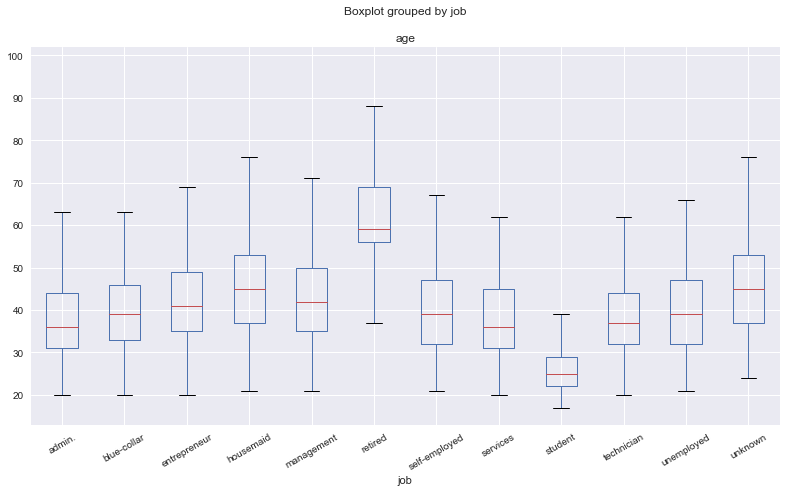

In [756]:
df.boxplot('age','job',rot = 30,figsize=(13,7))

### Let's Explore Categorical Features

In [757]:
cat_df = df.select_dtypes(include=['object']).copy()

In [758]:
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 11 columns):
job            41188 non-null object
marital        41188 non-null object
education      41188 non-null object
default        41188 non-null object
housing        41188 non-null object
loan           41188 non-null object
contact        41188 non-null object
month          41188 non-null object
day_of_week    41188 non-null object
poutcome       41188 non-null object
y              41188 non-null object
dtypes: object(11)
memory usage: 3.5+ MB


### There are 11 Catagorical Features includind lables

In [759]:
cat_df.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


### Frequency of Each Category

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64


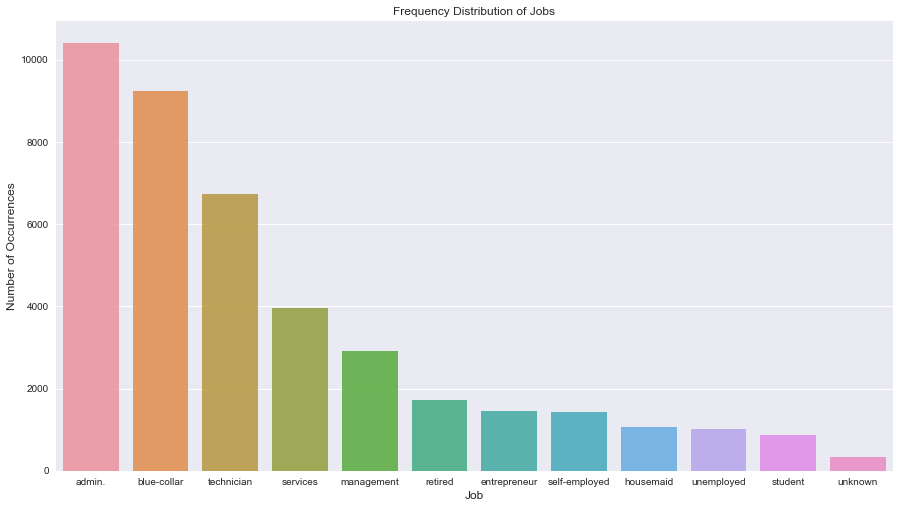

In [760]:
print(cat_df['job'].value_counts())
job_count = cat_df['job'].value_counts()
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(15,8.27)})
sns.barplot(job_count.index, job_count.values, alpha=0.9)
plt.title('Frequency Distribution of Jobs')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Job', fontsize=12)
plt.show()

In [761]:
print(cat_df['marital'].value_counts())

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64


university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64


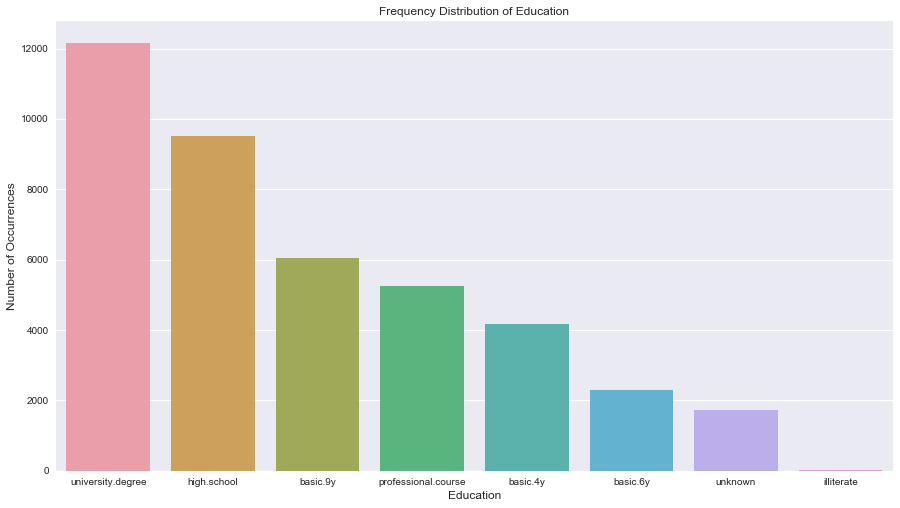

In [762]:
print(cat_df['education'].value_counts())
education_count = cat_df['education'].value_counts()
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(15,8.27)})
sns.barplot(education_count.index, education_count.values, alpha=0.9)
plt.title('Frequency Distribution of Education')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Education', fontsize=12)
plt.show()

In [763]:
print(cat_df['default'].value_counts())

no         32588
unknown     8597
yes            3
Name: default, dtype: int64


In [764]:
print(cat_df['housing'].value_counts())

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64


In [765]:
print(cat_df['loan'].value_counts())

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64


In [766]:
print(cat_df['contact'].value_counts())

cellular     26144
telephone    15044
Name: contact, dtype: int64


may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64


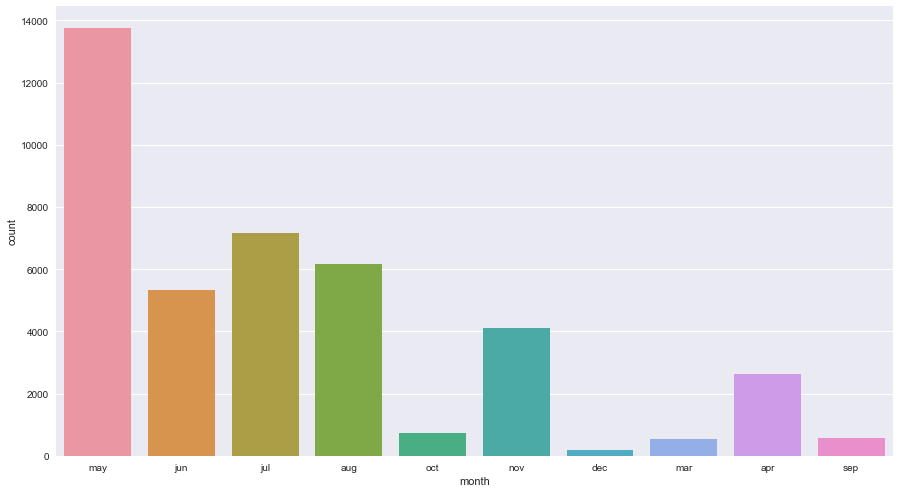

In [767]:
print(cat_df['month'].value_counts())
sns.countplot(x="month", data=cat_df)

In [768]:
print(cat_df['day_of_week'].value_counts())

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64


In [769]:
print(cat_df['poutcome'].value_counts())

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64


### The features with less than or equal to 3 categories are considered as individual features

In [770]:
#We will consider the binary categaries as different features
marital = pd.get_dummies(df['marital'],drop_first=True)
marital.head(1)

,married,single,unknown
0,1,0,0


In [771]:
default = pd.get_dummies(df['default'],drop_first=True)
default.head(1)

,unknown,yes
0,0,0


In [772]:
housing = pd.get_dummies(df['housing'],drop_first=True)
housing.head(1)

,unknown,yes
0,0,0


In [773]:
loan = pd.get_dummies(df['loan'],drop_first=True)
loan.head(1)

,unknown,yes
0,0,0


In [774]:
contact = pd.get_dummies(df['contact'],drop_first=True)
contact.head(1)

,telephone
0,1


In [775]:
poutcome = pd.get_dummies(df['poutcome'],drop_first=True)
poutcome.head(1)

,nonexistent,success
0,1,0


#### Ranking the job title proportional to the frequency 

In [776]:

def rank(x):
    if x == 'admin.':
        return 12
    if x == 'blue-collar':
        return 11
    if x == 'technician':
        return 10
    if x == 'services':
        return 9
    if x == 'management':
        return 8
    if x == 'retired':
        return 7
    if x == 'entrepreneur':
        return 6
    if x == 'self-employed':
        return 5
    if x == 'housemaid':
        return 4
    if x == 'unemployed':
        return 3
    if x == 'student':
        return 2
    if x == 'unknown':
        return 1

In [777]:
cat_df['job'] = cat_df['job'].apply(rank)
cat_df['job'].count()

41188

Similarly Ranking the education proportional to the frequency

In [778]:
def rank_education(x):
    if x == 'university.degree':
        return 8
    if x == 'high.school':
        return 7
    if x == 'basic.9y':
        return 6
    if x == 'professional.course':
        return 5
    if x == 'basic.4y':
        return 4
    if x == 'basic.6y':
        return 3
    if x == 'unknown':
        return 2
    if x == 'illiterate':
        return 1

In [779]:
cat_df['education'] = cat_df['education'].apply(rank_education)

### Ranking using probability distributions

In [780]:
count = cat_df['month'].count()   
may = cat_df[cat_df['month']=='may']['month'].count()/count
jul = cat_df[cat_df['month']=='jul']['month'].count()/count
aug = cat_df[cat_df['month']=='aug']['month'].count()/count 
jun = cat_df[cat_df['month']=='jun']['month'].count()/count  
nov = cat_df[cat_df['month']=='nov']['month'].count()/count  
apr = cat_df[cat_df['month']=='apr']['month'].count()/count 
oct = cat_df[cat_df['month']=='oct']['month'].count()/count
sep = cat_df[cat_df['month']=='sep']['month'].count()/count
mar = cat_df[cat_df['month']=='mar']['month'].count()/count
dec = cat_df[cat_df['month']=='dec']['month'].count()/count


In [781]:
l = [may,jul,aug,jun,nov,apr,oct,sep,mar,dec]
def month_rank(x):
    if x == 'may':
        return l[0]
    if x == 'jul':
        return l[1]
    if x == 'aug':
        return l[2]
    if x == 'jun':
        return l[3]
    if x == 'nov':
        return l[4]
    if x == 'apr':
        return l[5]
    if x == 'oct':
        return l[6]
    if x == 'sep':
        return l[7]
    if x == 'mar':
        return l[8]
    if x == 'dec':
        return l[9]
    

In [782]:
cat_df['month'] = cat_df['month'].apply(month_rank)

In [783]:
cat_df['month'].tail()

41183    0.099568
41184    0.099568
41185    0.099568
41186    0.099568
41187    0.099568
Name: month, dtype: float64

In [784]:
print(cat_df['day_of_week'].value_counts())

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64


### there are almost equal number of records for each day. (Uniform Distribution) It will not affect the learning. So deleting day_of_week column

In [785]:
del cat_df['day_of_week']

In [786]:
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 10 columns):
job          41188 non-null int64
marital      41188 non-null object
education    41188 non-null int64
default      41188 non-null object
housing      41188 non-null object
loan         41188 non-null object
contact      41188 non-null object
month        41188 non-null float64
poutcome     41188 non-null object
y            41188 non-null object
dtypes: float64(1), int64(2), object(7)
memory usage: 3.1+ MB


In [787]:
# Lets drop the columns which we have converted to number and add new columns to pur dataframe
cat_df.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [788]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [789]:
df.drop(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact','month', 'poutcome'],axis=1,inplace=True)

In [790]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 12 columns):
age               41188 non-null int64
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(2)
memory usage: 3.8+ MB


In [791]:
# let's add the categorical columns
df1 = pd.concat([marital,default,housing,loan,contact,poutcome],axis=1)

In [792]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 12 columns):
married        41188 non-null uint8
single         41188 non-null uint8
unknown        41188 non-null uint8
unknown        41188 non-null uint8
yes            41188 non-null uint8
unknown        41188 non-null uint8
yes            41188 non-null uint8
unknown        41188 non-null uint8
yes            41188 non-null uint8
telephone      41188 non-null uint8
nonexistent    41188 non-null uint8
success        41188 non-null uint8
dtypes: uint8(12)
memory usage: 482.8 KB


In [793]:
job = cat_df['job']
education = cat_df['education']
month = cat_df['month']
df2 = pd.concat([job,education,month], axis=1)

In [794]:
#delete day_of_week which in not important
del df['day_of_week']

In [795]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 11 columns):
age               41188 non-null int64
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(1)
memory usage: 3.5+ MB


In [796]:
df_features = pd.concat([df,df1,df2], axis=1)

In [797]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 26 columns):
age               41188 non-null int64
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
married           41188 non-null uint8
single            41188 non-null uint8
unknown           41188 non-null uint8
unknown           41188 non-null uint8
yes               41188 non-null uint8
unknown           41188 non-null uint8
yes               41188 non-null uint8
unknown           41188 non-null uint8
yes               41188 non-null uint8
telephone         41188 non-null uint8
nonexistent       41188 non-null uint8
success           4118

In [798]:
#convert y into yes = 1 and no = 0
def fun_y(x):
    if x == 'yes':
        return 1
    else:
        return 0

In [799]:
df_features['y'] = df_features['y'].apply(fun_y)

In [800]:
df_features.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,unknown,yes,unknown,yes,telephone,nonexistent,success,job,education,month
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,1,1,0,4,4,0.334296
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,1,1,0,9,7,0.334296
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,1,1,0,9,7,0.334296
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,1,1,0,12,3,0.334296
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,1,1,0,9,7,0.334296


In [801]:
df_y = df_features['y']
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 26 columns):
age               41188 non-null int64
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null int64
married           41188 non-null uint8
single            41188 non-null uint8
unknown           41188 non-null uint8
unknown           41188 non-null uint8
yes               41188 non-null uint8
unknown           41188 non-null uint8
yes               41188 non-null uint8
unknown           41188 non-null uint8
yes               41188 non-null uint8
telephone         41188 non-null uint8
nonexistent       41188 non-null uint8
success           41188

In [802]:
# Normalize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_features.drop('y',axis=1))
scaled_features = scaler.transform(df_features.drop('y',axis=1))

In [803]:
df_feat = pd.DataFrame(scaled_features)

In [804]:
df_feat = pd.concat([df_feat,df_y], axis=1)

## Train Test Validation Split

In [805]:
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 26 columns):
0     41188 non-null float64
1     41188 non-null float64
2     41188 non-null float64
3     41188 non-null float64
4     41188 non-null float64
5     41188 non-null float64
6     41188 non-null float64
7     41188 non-null float64
8     41188 non-null float64
9     41188 non-null float64
10    41188 non-null float64
11    41188 non-null float64
12    41188 non-null float64
13    41188 non-null float64
14    41188 non-null float64
15    41188 non-null float64
16    41188 non-null float64
17    41188 non-null float64
18    41188 non-null float64
19    41188 non-null float64
20    41188 non-null float64
21    41188 non-null float64
22    41188 non-null float64
23    41188 non-null float64
24    41188 non-null float64
y     41188 non-null int64
dtypes: float64(25), int64(1)
memory usage: 8.2 MB


In [808]:
from sklearn.model_selection import train_test_split
# Form training, test, and validation sets
X_trainAndTest, X_validation, y_trainAndTest, y_validation = train_test_split(df_feat.drop('y',axis=1), df_feat['y'], test_size=0.20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_trainAndTest, y_trainAndTest, test_size=0.20, random_state=42)

### Training and Predicting

In [809]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

In [810]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [811]:
predictions_test = logmodel.predict(X_test)

In [812]:
predictions_valid = logmodel.predict(X_validation)

##### Evaluation

In [813]:
from sklearn.metrics import classification_report

In [815]:
print(classification_report(y_test,predictions_test))
print(classification_report(y_validation,predictions_valid))

             precision    recall  f1-score   support

          0       0.93      0.98      0.95      5848
          1       0.69      0.42      0.53       742

avg / total       0.90      0.91      0.90      6590

             precision    recall  f1-score   support

          0       0.93      0.97      0.95      7303
          1       0.67      0.41      0.51       935

avg / total       0.90      0.91      0.90      8238



### We can tune the model on validation data using hyperparameters like learning rate, regularization parameter, cross validation.